# Team 20 
# Customer Personality Aanalysis

## Introduction
We are going to use Customer Personality Analysis data set (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) which contains data of a company’s customers. 
We will analyze this data set, get insights that help marketting team to conduct better marketing strategies as customizing campains for certain customer groups or clusters. 

## Question
How many groups shuld we divide the customers into? and What marketing recommendations for each group?

### Assumptions are:
1. **'Graduation'** is the same as **'Bachelor'**
2. **'2n Cycle'** is the same as **'Master'**
3. **'Income'** more than 125K is an outlier
4. **'Age'**: more than 100 years to be ignored

In [ ]:
# Python 3.12.3 was used to compile this file.

# Importing Required Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import csv

# Define the Location of the dataset tSV file (Tab seperated value)
file_path = r'C:\Users\Administrator\Downloads\DSIProject\cpa.tsv'   # Original file name (marketing_campaign.csv) was modified to reflect the right file type and for ease of use.

# Read the dataset and store it in alist called 'data'
# Open the TSV file and read its contents
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    data = list(reader)  # Store the data in a list

# Converting the list 'data' to Pandas DataFrame called 'df'
df = pd.DataFrame(data[1:], columns=data[0])

# Convert 'Income' column to numeric, handling errors
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [88]:
# Get information on the dataframe and it's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   object 
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   object 
 9   MntWines             2240 non-null   object 
 10  MntFruits            2240 non-null   object 
 11  MntMeatProducts      2240 non-null   object 
 12  MntFishProducts      2240 non-null   object 
 13  MntSweetProducts     2240 non-null   object 
 14  MntGoldProds         2240 non-null   object 
 15  NumDealsPurchases    2240 non-null   o

In [89]:
# Getting Description on each coloumn and that is:
    # Getting count of values 
    # Getting Mean, standard Deviation, Minimumm, 25% , 50%, 75%, and maximum value
df.describe().T   # T: means transpose 

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0


## Data Exploring, Cleansing & Manipulation

#### Cleansing **'Income'** values

In [90]:
# Cleansing 'Income' values

# find out how many 'Income' values is NA
print('Number of NA values in Income Before cleansing is : ', df['Income'].isna().sum())

# Filter out rows where 'Income' is NA by using .loc and boolean indexing for rows then Dropping those rows from the data frame 'df'. 
df = df.loc[df['Income'].notna()]

print("NA values from 'Income' Removed Completley")

Number of NA values in Income Before cleansing is :  24
NA values from 'Income' Removed Completley


In [91]:
# Reseting the index to correct index errors after dropping some rows
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   object 
 6   Teenhome             2216 non-null   object 
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   object 
 9   MntWines             2216 non-null   object 
 10  MntFruits            2216 non-null   object 
 11  MntMeatProducts      2216 non-null   object 
 12  MntFishProducts      2216 non-null   object 
 13  MntSweetProducts     2216 non-null   object 
 14  MntGoldProds         2216 non-null   object 
 15  NumDealsPurchases    2216 non-null   o

#### Checking for **duplicate values** and dropping them if any

In [92]:
# Check if there are duplicated values using duplicate() and use sum() function to count how many.
duplicates = df.duplicated().sum()
print('Number of Duplicates in the dataset is: ', duplicates)

Number of Duplicates in the dataset is:  0


##### **Marital_Status** values Cleansing and Manipulation
1. Dropping 'Absurd' and 'YOLO' values
2. Replace 'Alone' by 'Single'
3. Replace 'Together' by 'Married'

No of Absurd =  0
No of YOLO =  0
The categories in the Marital Status are:  ['Single' 'Married' 'Divorced' 'Widow']


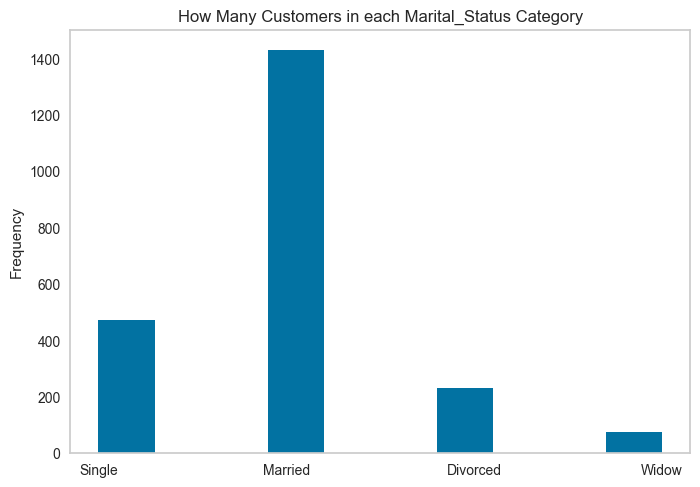

In [93]:
# Marital_Status Column cleansing:
    # 1. Dropping 'Absurd' and  'YOLO'
    # 2. Replace 'Alone' by 'Single'
    # 3. Replace 'Together' by 'Married' 

# Dropping the rows that has Marital_Status == 'Absurd'
df = df[df['Marital_Status'] != 'Absurd']

# Dropping the rows that has Marital_Status == 'YOLO'
df = df[df['Marital_Status'] != 'YOLO']

# Making Sure All Rows where Marital_Status = 'Absurd'
print('No of Absurd = ',df[df['Marital_Status'] == 'Absurd']['Marital_Status'].count())

# Making Sure All Rows where Marital_Status = 'YOLO' 
print('No of YOLO = ',df[df['Marital_Status'] == 'YOLO']['Marital_Status'].count())

# Revise the Marital_status
df['Marital_Status_revised'] = df['Marital_Status'].replace({
    'Alone': 'Single',    # Replace 'Alone' by 'Single'
    'Together': 'Married' # Replace 'Together' by 'Married'
    })

print('The categories in the Marital Status are: ', df['Marital_Status_revised'].unique())

# Saving the revised marital status in 'Marital_status'
df['Marital_Status']=df['Marital_Status_revised']

# Dropping Marital_Status_revised
df=df.drop(columns=['Marital_Status_revised'])

# Showing how many customers in each Marital Status
plt.hist(df['Marital_Status'])
plt.ylabel('Frequency')
plt.title('How Many Customers in each Marital_Status Category')
plt.grid(axis='both')

In [94]:
# Reseting the index to correct index errors after dropping column 'Marital_Status_revised'
df.reset_index(drop=True, inplace=True)

#### **Education** values Cleansing and Manipulation
1. Replace 'Graduation' by 'Bachelor'
2. Replace '2n Cycle' by 'Master'

The categories in the Education are:  ['Bachelor' 'PhD' 'Master' 'Basic']


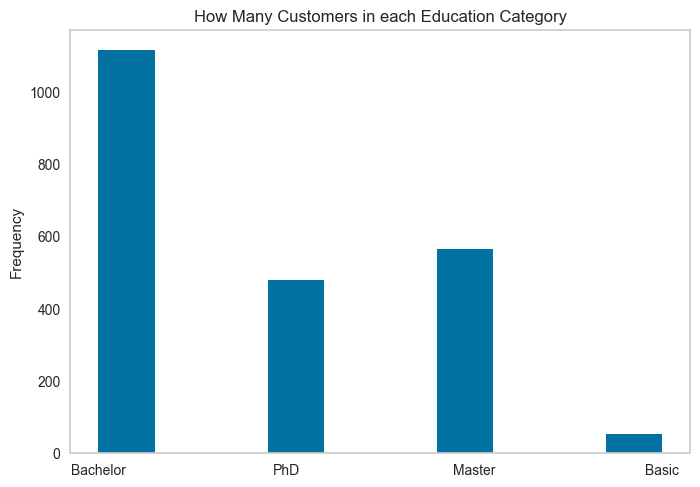

In [95]:
# Education Column cleansing:
    # 1. Replace 'Graduation' by 'Bachelor'
    # 2. Replace '2n Cycle' by 'Master'

# Replace 'Graduation' by 'Bachelor', and '2n Cycle' by 'Master'
df['Education_revised'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master'
})
print('The categories in the Education are: ',df['Education_revised'].unique())

# Saving the revised Education in 'Education'
df['Education']=df['Education_revised']

# Dropping the revised Edication column
df=df.drop(columns=['Education_revised'])

# Showing how many customers in each Education Category
plt.hist(df['Education'])
plt.ylabel('Frequency')
plt.title('How Many Customers in each Education Category')
plt.grid(axis='both')


#### **Adding** a New Column called **'Age' ( Age of customer)** AND **Dropping** any row with customer over 100 years old

Number of persons with Age more than 100 years Before Removing them from our Data is:  3
Number of persons with Age more than 100 years After Removing them from our Data is:  0


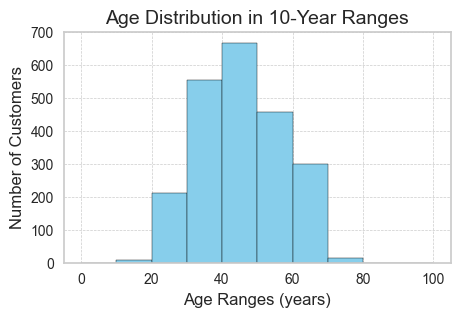

In [96]:
# Adding a new column called 'Age'

df['Age'] = 2014 - df['Year_Birth'].astype(int)   # 2014 was the latest year in the dataset

# Finding how many persons with age more than 100 years old
print('Number of persons with Age more than 100 years Before Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))    # we found 3 persons with Age > 100 years old

# Remove people with age > 100 years
df = df[df['Age'] <= 100]


# Reseting the index to correct index errors after dropping and removing some data
df.reset_index(drop=True, inplace=True)

print('Number of persons with Age more than 100 years After Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))

# Plot a histogram of Age ranges in 10-year bins
plt.figure(figsize=(5,3))  # set the figure size
plt.hist(df['Age'], bins=range(0, 101, 10), color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Age Distribution in 10-Year Ranges', fontsize=14)
plt.xlabel('Age Ranges (years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

#### Visualizing the **'Income'** values

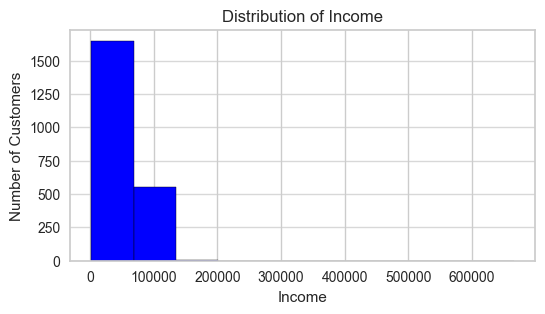

In [97]:
# Plot histogram for 'Income' column using hist() function
plt.figure(figsize=(6, 3))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### We have ***outlier*** in the Income  ***coloumn*** So, We are going to remove outliers (assumption **'Income'** more than 125K is an outlier)

Number of persons with > 100K INCOME is :  13
Number of persons with > 125K INCOME is :  8
Number of persons with > 150K INCOME is :  8
Number of persons with > 125K INCOME After Dropping Values > 125K is :  0


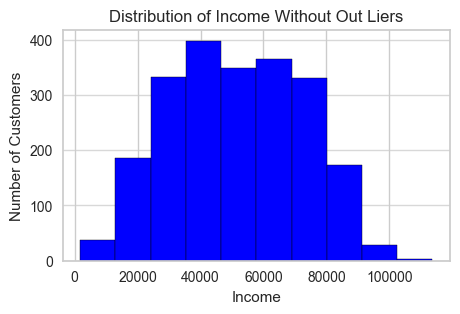

In [98]:
# To Remove the outliers we need to explore how many Values are more than 100K and 125K and 100K for the INCOME
# Displaying the how many INCOME values that are more than 100K, 125K & 150 K 
print('Number of persons with > 100K INCOME is : ', df[df['Income'] >=100000]['Income'].count())
print('Number of persons with > 125K INCOME is : ', df[df['Income'] >=125000]['Income'].count())
print('Number of persons with > 150K INCOME is : ', df[df['Income'] >=150000]['Income'].count())

# Updating the INCOME column by dropping rows when Income >= 125,000
df = df[df['Income'] <= 125000]

# Reseting the index to correct index errors after manuplating some data
df.reset_index(drop=True, inplace=True)

# Making sure there is no Income more than 125,000
print('Number of persons with > 125K INCOME After Dropping Values > 125K is : ', df[df['Income'] >=125000]['Income'].count())

# Plot the new histogram for 'Income' column After Removing Outliers
plt.figure(figsize=(5, 3))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Income Without Out Liers')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Dropping 2 columns: **'Z_CostContact'** & **'Z_Revenue'**   because they do not add value to the data, 'Z_CostContact'=3 always, 'Z_Revenue'=11 always.

In [99]:
# Dropping 2 columns: 'Z_CostContact'   &    'Z_Revenue'
    # Reason for Droping 'Z_CostContact' is that column has always a value of 3  
    # Reason for Droping 'Z_Revenue' is that column has always a value of 11  

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
print(" Z_CostContact Coloumn Removed")
print(" Z_Revenue Coloumn Removed")
df.head(5)

 Z_CostContact Coloumn Removed
 Z_Revenue Coloumn Removed


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-12,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-14,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Bachelor,Married,71613.0,0,0,21-08-13,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Bachelor,Married,26646.0,1,0,10-02-14,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,6,5,0,0,0,0,0,0,0,33


#### Changing the format of 'Dt_Customer' to ease calculations

In [100]:
# Change the date format
# Convert 'Dt_Customer' to datetime to help in calculations related to date  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_18524\206559480.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


#### Add a column called **'Since_Years'** to the data frame  to show how many years has been a customer and Dropping 'Dt_Customer'

In [101]:
# Add a colum called 'Since_Years' to the data frame  to show how many years has been a customer
df['Since_Years'] = 2014 - df['Dt_Customer'].dt.year

# Dropping Dt_Customer coloumn since it is not needed after creating Since_Year coloumn
df=df.drop(columns=['Dt_Customer'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,1,57,2
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,0,60,0
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,0,49,1
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,0,30,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,0,33,0


#### Add a column called **'Total Number Purchases'** to the data frame  to show how many number of purchases customer done

In [102]:
# Creating a new column in the df called 'Total Number Purchases' = 'NumWebPurchases' + 'NumStorePurchases' + 'NumStorePurchases'
df['Total Number Purchases'] = df['NumWebPurchases'].astype(int) + df['NumStorePurchases'].astype(int) + df['NumCatalogPurchases'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,57,2,22
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,60,0,4
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,49,1,20
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,30,0,6
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,33,0,14


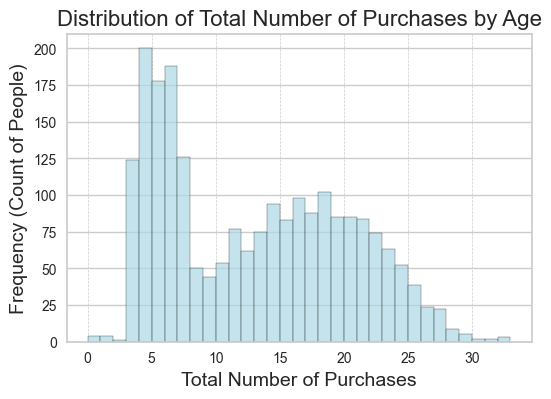

In [103]:
# Showing Total Number of Purchases by Age    
plt.figure(figsize=(6, 4))  # Set figure size

# Create a histogram
plt.hist(
        df['Total Number Purchases'], 
        bins=range(0, df['Total Number Purchases'].max() + 2, 1), 
        color='lightblue', 
        edgecolor='black', 
        alpha=0.7
    )

# Add titles and labels
plt.title('Distribution of Total Number of Purchases by Age', fontsize=16)
plt.xlabel('Total Number of Purchases', fontsize=14)
plt.ylabel('Frequency (Count of People)', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

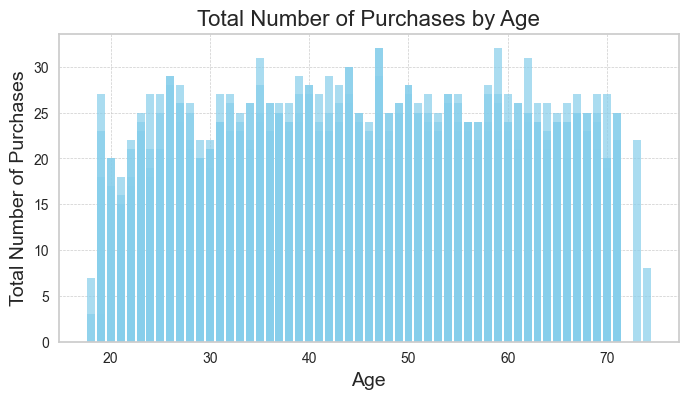

In [104]:
# Showing Total Number of Purchases by Age    
plt.figure(figsize=(8, 4))  # Setting figure size

# Create a bar plot
plt.bar(
        df['Age'], 
        df['Total Number Purchases'], 
        alpha=0.7, 
        color='skyblue', 
       )

# Add titles and labels
plt.title('Total Number of Purchases by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Number of Purchases', fontsize=14)
plt.grid(axis='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

#### Add a column called **'Total Amount Purchases'** to the data frame  to show how much in Dollars value the customer done purchases.

In [105]:
# Creating a new column in the df called 'Total Amount Purchases' = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
df['Total Amount Purchases'] = df['MntWines'].astype(int) + df['MntFruits'].astype(int) + df['MntMeatProducts'].astype(int)+ df['MntFishProducts'].astype(int)+ df['MntSweetProducts'].astype(int)+ df['MntGoldProds'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Total Amount Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,1,57,2,22,1617
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,60,0,4,27
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,49,1,20,776
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,30,0,6,53
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,33,0,14,422


#### Add a column called **'No of Accepted Campains'** to the data frame  to show how many campains or promotions the customer accepted.

In [106]:
#Creating a feature to get a sum of accepted promotions 
df["No of Accepted Campains"] = df["AcceptedCmp1"].astype(int)+ df["AcceptedCmp2"].astype(int)+ df["AcceptedCmp3"].astype(int)+ df["AcceptedCmp4"].astype(int)+ df["AcceptedCmp5"].astype(int)
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Total Amount Purchases,No of Accepted Campains
2196,10870,1967,Bachelor,Married,61223.0,0,1,46,709,43,...,0,0,0,0,0,47,1,16,1341,0
2197,4001,1946,PhD,Married,64014.0,2,1,56,406,0,...,0,1,0,0,0,68,0,15,444,1
2198,7270,1981,Bachelor,Divorced,56981.0,0,0,91,908,48,...,0,0,0,0,0,33,0,18,1241,1
2199,8235,1956,Master,Married,69245.0,0,1,8,428,30,...,0,0,0,0,0,58,0,21,843,0
2200,9405,1954,PhD,Married,52869.0,1,1,40,84,3,...,0,0,0,0,1,60,2,8,172,0


#### Adding a column called **'Family_Size'** to the data frame to show how many members in the family

In [107]:
# Adding a column called 'Family_Size' to the data frame to show how many members in the family
df['Family_Size'] = 1 + df['Kidhome'].astype(int) + df['Teenhome'].astype(int) + df['Marital_Status'].apply(lambda x: 1 if x == 'Married' else 0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Total Amount Purchases,No of Accepted Campains,Family_Size
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,1,57,2,22,1617,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,60,0,4,27,0,3
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,49,1,20,776,0,2
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,30,0,6,53,0,3
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,33,0,14,422,0,3


#### Making sure that the type of **'Recency'** coloumn is float to avoid problems when doing dimentional reduction (PCA)

In [108]:
# Making sure that the type of recency coloumn is float
df['Recency'] = df['Recency'].astype(float)

#### We apply one-hot encoding to the **Education** and **Marital_Status** columns to convert categorical data ('Education', 'Marital_Status') into numerical format.

In [109]:
# Applying One-Hot Encoding on the categorical variables ('Education', 'Marital_Status') To Convert them into Numerical values
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False


#### Keep a copy of the modified data set before scaling (df_org)

In [110]:
df_org =df.copy()  # Keep a copy of the modified data set before scaling
df_org.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False
5,7446,1967,62513.0,0,1,16.0,520,42,98,0,...,0,3,False,False,True,False,False,True,False,False
6,965,1971,55635.0,0,1,34.0,235,65,164,50,...,0,2,True,False,False,False,True,False,False,False
7,6177,1985,33454.0,1,0,32.0,76,10,56,3,...,0,3,False,False,False,True,False,True,False,False
8,4855,1974,30351.0,1,0,19.0,14,0,24,3,...,0,3,False,False,False,True,False,True,False,False
9,5899,1950,5648.0,1,1,68.0,28,0,6,1,...,1,4,False,False,False,True,False,True,False,False


#### We would apply **PCA** only to the **numerical columns** and leave the binary categorical variables out of the dimensional reduction; Since PCA dosen't deal good with categorical values. The binary data can then be handled separately through clustering or as features for later analysis.

In [111]:
# Dividing the columns into two types: 
# 1. Numerical values (in those we are going to standarize the values )
# 2. Categorical or Boolean

# ID of customers Excluded from scaling
# Exluding Totals from PCA 
# Excluding: 'Age',
# Excluding: 'Since_Years','Total Number Purchases', 'Total Amount Purchases',
# Excluding: 'No of Accepted Campains', 'Family_Size'

numerical_all = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
print('Numerical Coloumns identified')

non_numerical_all = ['Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow']
print('Non-Numerical Coloumns identified')

Numerical Coloumns identified
Non-Numerical Coloumns identified


#### We would Standarizing the numerical values (numerical_all coloumns) only using **standardscaler()**.

In [112]:
# Standarizing the numerical values (numerical_all coloumns)
scaler = StandardScaler()
df[numerical_all] = scaler.fit_transform(df[numerical_all])
df_scaled = df[numerical_all]
print('All Numerical Values has been standarized')
df_scaled.head()

All Numerical Values has been standarized


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.016749,0.315298,-0.824661,-0.930657,0.309592,0.973919,1.549881,1.748119,2.460069,1.479104,...,2.632148,-0.561918,0.689322,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,2.376878
1,-1.273178,-0.254008,1.036959,0.906451,-0.382021,-0.873863,-0.638067,-0.731372,-0.652429,-0.635541,...,-0.587576,-1.178460,-0.140201,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
2,-0.332936,0.965746,-0.824661,-0.930657,-0.796989,0.355031,0.569077,-0.175782,1.343231,-0.149416,...,-0.229829,1.287706,-0.554962,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
3,1.291120,-1.204845,1.036959,-0.930657,-0.796989,-0.873863,-0.562621,-0.667089,-0.505959,-0.586928,...,-0.945324,-0.561918,0.274560,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
4,1.034691,0.322780,1.036959,-0.930657,1.554495,-0.394150,0.418184,-0.217107,0.153159,-0.003578,...,0.127918,0.054623,-0.140201,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720


#### Conduct Dimention reduction (PCA with n_components = 3) get a new dataset where each data point is represented by 3 principal components instead of the original 25 features.

In [113]:
# We need to conduct Dimention reduction (PCA)
# Import the PCA class
from sklearn.decomposition import PCA

scaled_df = df_scaled.copy()
# n_components = 3 means get a new dataset where each data point is represented by 3 principal components (instead of the original 25 features).
pca = PCA(n_components = 3,random_state = 42) 
scaled_df = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(scaled_df, columns=["Feature1","Feature2", "Feature3"])

print("The PCA transformed dataset is:")
pca_data.head()

The PCA transformed dataset is:


,Feature1,Feature2,Feature3
0,3.806861,-0.090608,-0.314517
1,-2.362278,0.271304,-0.192272
2,1.699520,0.124125,-1.072437
3,-2.623660,-1.430102,-0.062054
4,-0.423949,-0.110111,-0.673665


#### Visualizing the new feature set

The dataset after dimensionality reduction :


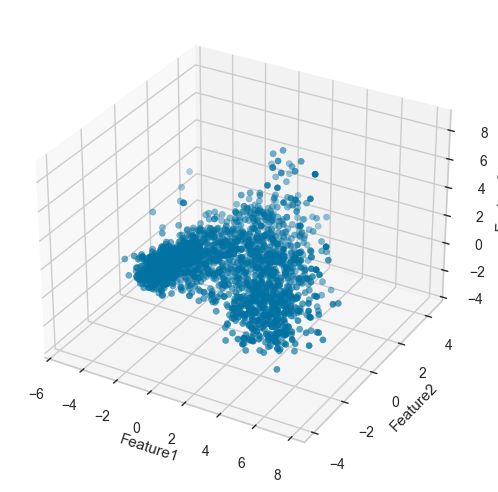

In [114]:
# Graph of PCA
from mpl_toolkits.mplot3d import Axes3D

x = pca_data["Feature1"]
y = pca_data["Feature2"]
z = pca_data["Feature3"]

print(f"The dataset after dimensionality reduction :")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3 principal components
ax.scatter(x, y, z)
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

plt.show()

# Segmentation
Determining the optimam number of clusters using Elbow method 

Determining the optimam number of clusters using Elbow method :


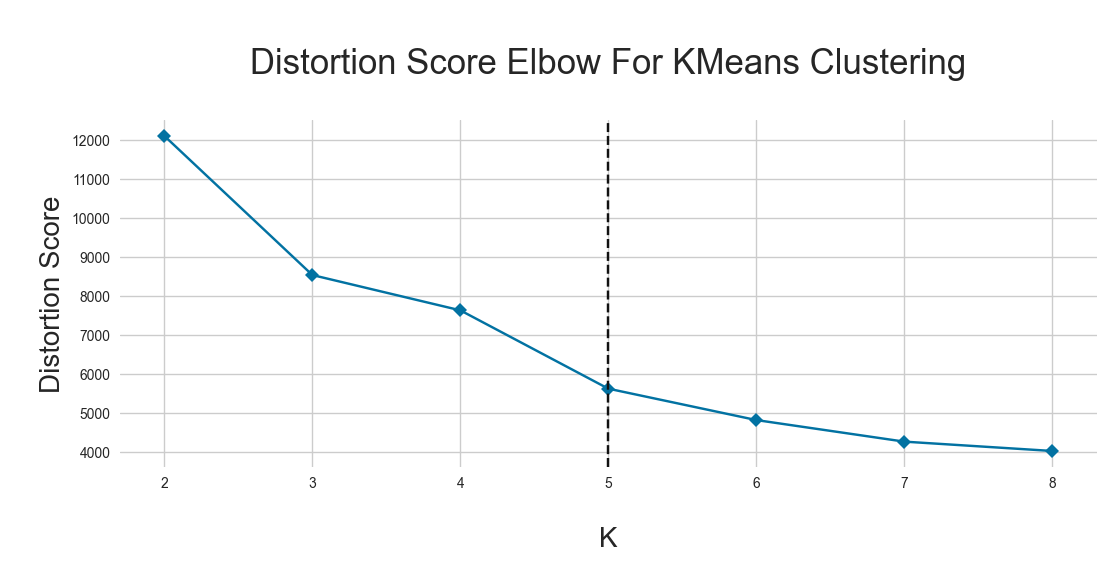

In [115]:
# Segmentation
# importing KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

print("Determining the optimam number of clusters using Elbow method :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=8, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

# Import the seaborn library
import seaborn as sns  # This line imports seaborn and assigns it to the alias 'sns'

sns.despine(left=True, bottom=True) # To Enhance the plot
plt.show()

#### From Dstortion Score Elbow for KMeans clustering graph that **K=4 is the optimal number of clusters**, So we will perform KMeans using K=4

In [116]:
# Perform K-means clustering Using K = 4
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(scaled_df)

# Create a new DataFrame
clustered_df = pd.DataFrame(scaled_df, columns=["Feature1", "Feature2", "Feature3"])  # Convert scaled_df to DataFrame
clustered_df['Cluster'] = clusters.labels_

# Display the clustered data
clustered_df.head(10)

,Feature1,Feature2,Feature3,Cluster
0,3.806861,-0.090608,-0.314517,2
1,-2.362278,0.271304,-0.192272,0
2,1.699520,0.124125,-1.072437,2
3,-2.623660,-1.430102,-0.062054,0
4,-0.423949,-0.110111,-0.673665,0
5,0.755279,1.322187,-0.387226,3
6,0.598611,1.310438,-0.776821,3
7,-2.389405,-0.991332,0.145698,0
8,-2.651627,-1.520924,1.429335,0
9,-4.666073,0.541652,1.847431,0


#### Adding the 'Cluster' Coloumn to the orignal dataframe 'df_org'.

In [117]:
#Adding the Clusters Coloumn to the orignal dataframe 'df_org'.
df_org["Cluster"]= clusters.labels_
df_org.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Cluster
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,1,True,False,False,False,False,False,True,False,2
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,3,True,False,False,False,False,False,True,False,0
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,2,True,False,False,False,False,True,False,False,2
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,3,True,False,False,False,False,True,False,False,0
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,3,False,False,False,True,False,True,False,False,0


#### Visualizing in 3D the clusters

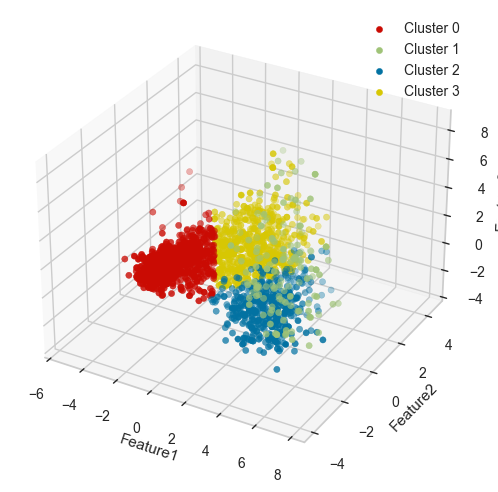

In [118]:
# Clusters Plotting
from mpl_toolkits.mplot3d import Axes3D

# Clustered_df has the columns 'Feature1', 'Feature2', 'Feature3', and 'Cluster'

# Define X, Y & Z 
x = clustered_df["Feature1"]
y = clustered_df["Feature2"]
z = clustered_df["Feature3"]
cluster = clustered_df["Cluster"]

# Seting a color list for the 4 clusters
colors = ['r', 'g', 'b', 'y']  # Red, Green, Blue, Yellow 

# Create the figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster and plot the points in different colors
for i in range(4):  # We have 4 clusters (0, 1, 2, 3)
    ax.scatter(x[cluster == i], y[cluster == i], z[cluster == i], color=colors[i], label=f'Cluster {i}')

# Setting axis labels
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

# Add a legend to distinguish clusters
ax.legend()

# Show the plot
plt.show()

#### Showing the DOMINANT VARIABLE in each Feature

In [119]:
# Debugging

pca_components = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=["Feature1", "Feature2", "coFeature3"])
print("Loadings of the original variables in the principal components:")
print(pca_components)

Loadings of the original variables in the principal components:
            Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
Feature1     -0.061028  0.337153 -0.249663 -0.051058  0.001643  0.301645   
Feature2     -0.348957  0.082641 -0.095302  0.537329  0.041634  0.152309   
coFeature3    0.027708 -0.016785  0.080530  0.002172 -0.104192  0.198881   

            MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Feature1     0.259129         0.311767         0.269264          0.263323   
Feature2    -0.097395        -0.132690        -0.106197         -0.089095   
coFeature3  -0.206153        -0.058247        -0.204820         -0.172954   

            ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Feature1    ...             0.319411           0.281001          -0.243375   
Feature2    ...             0.014470           0.204855           0.157815   
coFeature3  ...            -0.010579          -0.086774           0.214997   

         

In [ ]:
# Identify dominant variables by component
dominant_features = pca_components.apply(lambda x: x.abs().nlargest(3).index, axis=1)
print("Most influential variables by component:")
print(dominant_features)

Most influential variables by component:
Feature1      Index(['Income', 'NumCatalogPurchases', 'MntMe...
Feature2      Index(['Teenhome', 'NumDealsPurchases', 'NumWe...
coFeature3    Index(['AcceptedCmp4', 'Response', 'AcceptedCm...
dtype: object


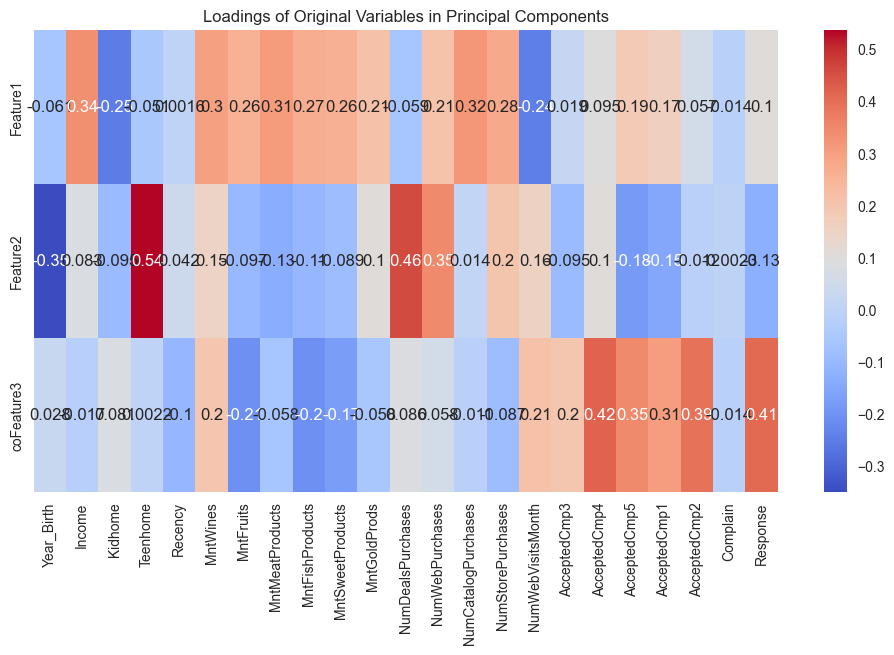

In [ ]:
# Generate the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, annot=True, cmap="coolwarm", cbar=True)
plt.title("Loadings of Original Variables in Principal Components")
plt.show()

### Clusters Analysis

In [122]:
# Display the number of data points in each cluster
cluster_counts = clustered_df['Cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)
print("\n")

# Calculate mean for each cluster
print("Mean for each feature for each cluster:")
cluster_summary = clustered_df.groupby('Cluster').mean()  
print(cluster_summary)
print("\n")

# Calculate standard deviation for each feature in each cluster
print("Standard deviation of features for each cluster:")
cluster_std = clustered_df.groupby('Cluster').std()
print(cluster_std)
print("\n")

Number of data points in each cluster:
Cluster
0    999
3    581
2    479
1    142
Name: count, dtype: int64


Mean for each feature for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0       -2.328964 -0.580183  0.049071
1        4.659867 -1.361195  3.118377
2        3.075920 -0.476185 -1.180594
3        0.329722  1.722865  0.126803


Standard deviation of features for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0        0.666929  0.940534  0.630738
1        1.470403  1.246252  2.080827
2        1.082562  1.050948  0.894728
3        1.114798  0.910772  1.135093




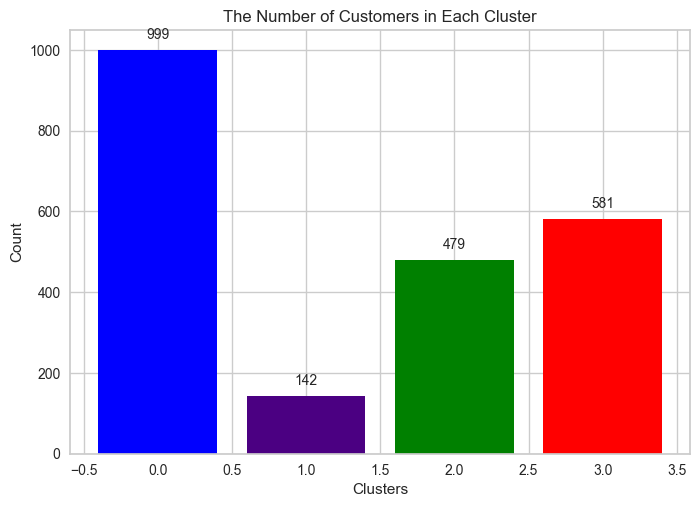

In [123]:
# Show The Number of Customers in Each Cluster

# Defining the values to be used in the plot
cluster_counts = clustered_df["Cluster"].value_counts()
cluster_labels = cluster_counts.index   # Define the X-Axis
cluster_values = cluster_counts.values  # Count in each Cluster

colors = ['blue', 'red', 'green', 'indigo']   # Colors to be used for Clusters

# Plot the bar chart
plt.bar(cluster_labels, cluster_values, color=colors)    # Bar chart 
plt.title("The Number of Customers in Each Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

# Adding data labels on top of each bar
for i in range(len(cluster_labels)):
    plt.text(cluster_labels[i], cluster_values[i] + 20,  # Position the label just above the bar
             str(cluster_values[i]),                    # The value to be displayed
             ha='center', va='bottom', fontsize=10)      # Horizontal and vertical alignment

plt.show()

#### Clusters analysis based on Education & Marital Status

In [124]:
# for Under Standing the Clusters and who is in each cluster

# Define the categorical columns explicitly
categorical_columns = [
       'Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow'
]

# Remove duplicates from df_org columns (if any)
df_org = df_org.loc[:, ~df_org.columns.duplicated()]

# Ensure the specified categorical columns exist in the DataFrame
valid_categorical_columns = [col for col in categorical_columns if col in df_org.columns]

# Group data by clusters
cluster_groups = df_org.groupby('Cluster')

# Profile categorical data for each cluster
categorical_profiles = {}
for cluster, group in cluster_groups:
    cluster_profile = {}
    for col in valid_categorical_columns:
        # Ensure the column is in boolean format (True/False)
        if group[col].dtype == 'bool':
            # Calculate the percentage distribution for True and False values in the cluster
            value_counts = group[col].value_counts(normalize=True) * 100  # Normalize to percentage
            cluster_profile[col] = value_counts
    categorical_profiles[cluster] = cluster_profile

# Convert profiles to DataFrames for readability
cluster_summaries = {}
for cluster, profile in categorical_profiles.items():
    summary = pd.DataFrame(profile).fillna(0)  # Replace NaNs with 0 for missing categories
    cluster_summaries[cluster] = summary

# Print profiles for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"Cluster {cluster} Profile:")
    print(summary.T)  # Transpose for better readability
    print("-" * 50)

Cluster 0 Profile:
                             False      True 
Education_Bachelor       51.251251  48.748749
Education_Basic          94.794795   5.205205
Education_Master         72.972973  27.027027
Education_PhD            80.980981  19.019019
Marital_Status_Divorced  90.390390   9.609610
Marital_Status_Married   35.535536  64.464464
Marital_Status_Single    76.676677  23.323323
Marital_Status_Widow     97.397397   2.602603
--------------------------------------------------
Cluster 1 Profile:
                              False      True 
Education_Bachelor        49.295775  50.704225
Education_Basic          100.000000   0.000000
Education_Master          75.352113  24.647887
Education_PhD             75.352113  24.647887
Marital_Status_Divorced   90.140845   9.859155
Marital_Status_Married    39.436620  60.563380
Marital_Status_Single     75.352113  24.647887
Marital_Status_Widow      95.070423   4.929577
--------------------------------------------------
Cluster 2 Profile:
    

### Interpretation of the above stats on clusters (in order to understand clusters more)

**Cluster 0: Married with higher education levels (Bachelor's degrees)**
*   Dominated by married individuals with a bachelor's degree.
* **Marketing strategies** should primarily target married individuals with bachelor's degrees as they represent the majority.

**Cluster 1: Married &  Singles with higher education levels (Bachelor's and Master's degrees)**
* A balanced distribution among married and single individuals with significant representation in master's and PhD education levels
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

**Cluster 2: Married individuals with higher education (Bachelor's and Master's degrees)**
* Higher proportion of married individuals with bachelor's and master's degrees.


**Cluster 3: Single individuals with a higher concentration of Bachelor's degree holders, ollowed by PhD holders.**
* Dominated by single individuals with bachelor's degrees, followed by PhD holders.
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

#### Visualizing Clusters Vs Education & Marital Status

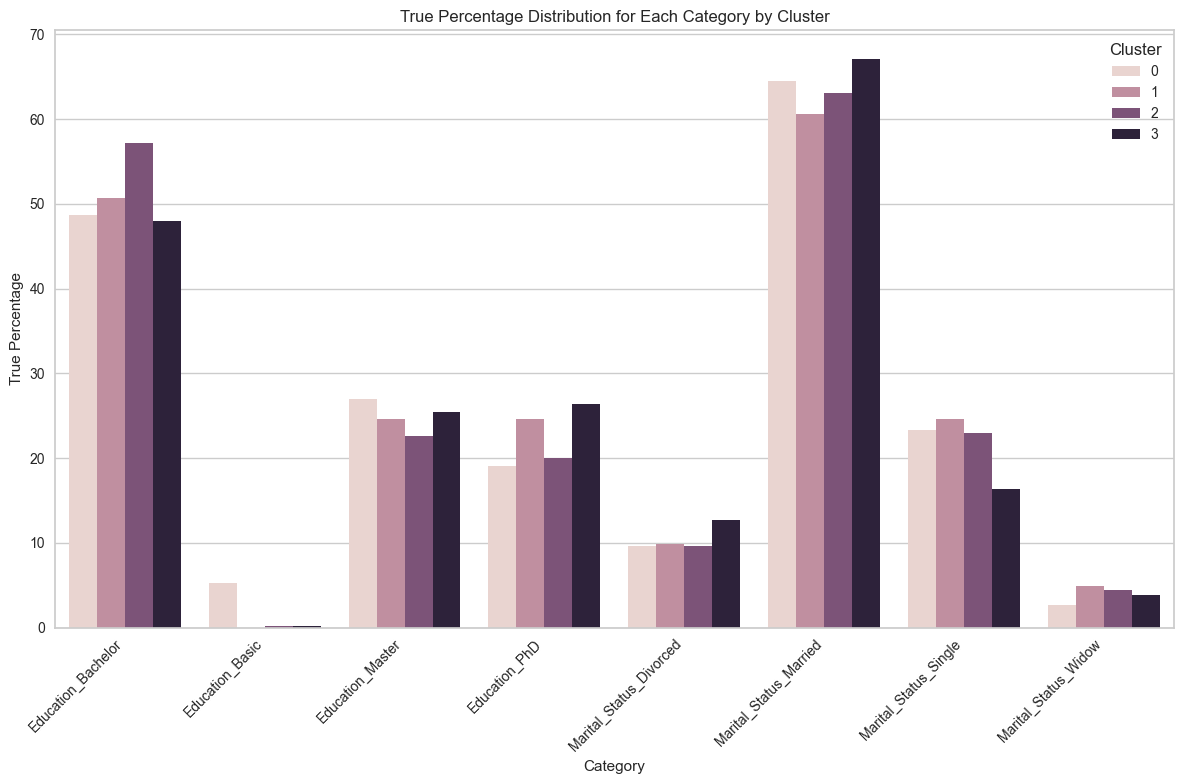

In [125]:
# Visualizing Clusters Vs Education & Marital Status
# Group data by clusters
cluster_groups = df_org.groupby('Cluster')

# Create an empty list to collect the data for plotting
plot_data = []

# Profile categorical data for each cluster and collect the True percentage for each category
for cluster, group in cluster_groups:
    for col in valid_categorical_columns:
        if group[col].dtype == 'bool':  # Ensure the column is boolean
            # Calculate the percentage of True values in each cluster
            true_percentage = group[col].mean() * 100  # Mean of booleans gives the percentage of True values
            plot_data.append({'Cluster': cluster, 'Category': col, 'True Percentage': true_percentage})

# Convert the list to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Plot using seaborn for better visualization
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=plot_df, x='Category', y='True Percentage', hue='Cluster')

# Customize the plot
plt.title('True Percentage Distribution for Each Category by Cluster')
plt.xlabel('Category')
plt.ylabel('True Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')

# Show the plot
plt.tight_layout()
plt.show()

#### Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

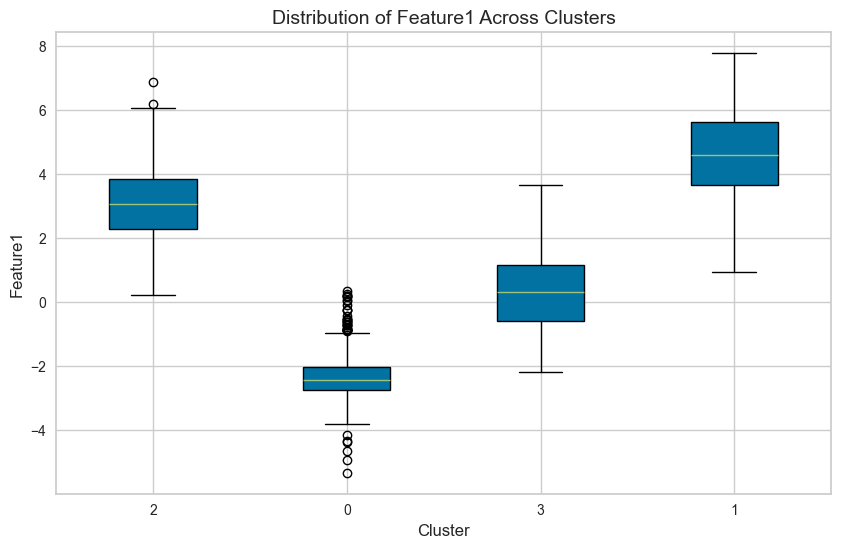

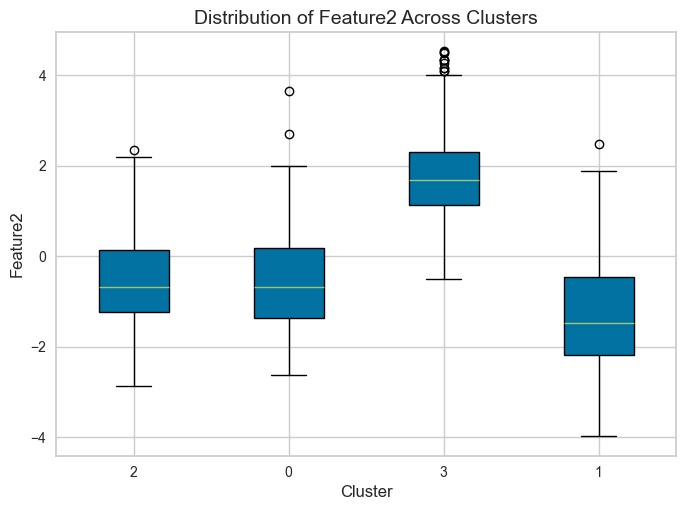

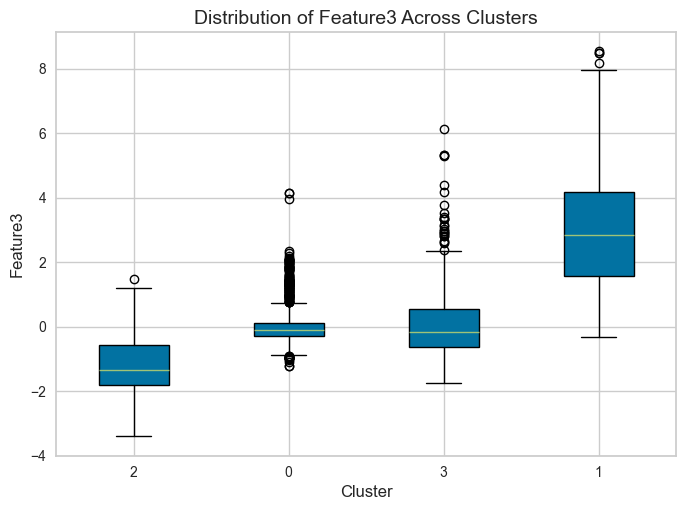

In [126]:
# Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

# Loop through the features to create boxplots for each cluster
plt.figure(figsize=(10, 6))  # Setting the figure size
for feature in ["Feature1", "Feature2", "Feature3"]:   # For Loop over the 3 features
    # Create a boxplot for the feature grouped by clusters
    cluster_groups = [clustered_df[clustered_df['Cluster'] == cluster][feature] for cluster in clustered_df['Cluster'].unique()]
    plt.boxplot(cluster_groups, tick_labels=clustered_df['Cluster'].unique(), patch_artist=True)
    
    # Customize the plot
    plt.title(f'Distribution of {feature} Across Clusters', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    
    # Show the plot
    plt.show()

#### Insights from the above 3 graphs
##### Feature 1 Figure:
* Cluster 1 represents the most positive "Feature1" values and has the widest variability. It could be ideal for premium or high-value offerings.

##### Feature 2 Figure:
* Cluster 3 with high "Feature2" values and variability suggest it could represent a high-performing group or one with significant potential. Tailored strategies focusing on premium offerings or personalized approaches could be effective.
* Clusters 0 and 2 as stable segments: Standardized strategies could work effectively for these groups, with less need for highly specialized approaches.

##### Feature 3 Figure:
* Cluster 1 represents the most positive "Feature3" values and has the widest variability. It could be ideal for premium or high-value offerings.

#### Showing Total Number of Accepted Campains for each cluster

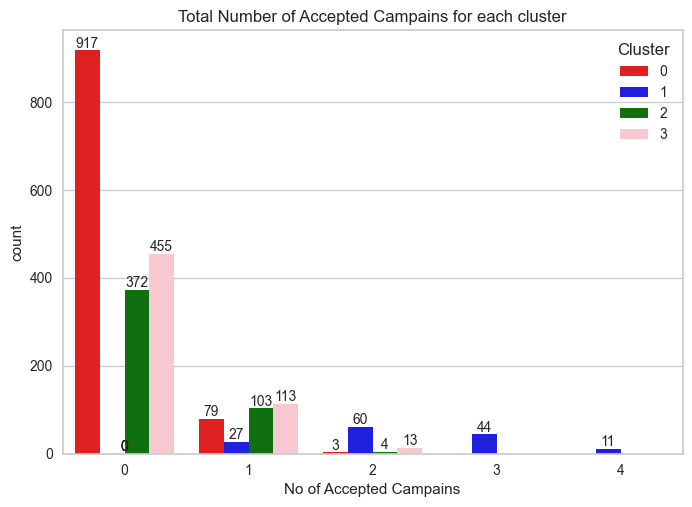

In [127]:
# Plotting Total Number of Accepted Campains for each cluster
plt.figure()

pl = sns.countplot(x= df_org['No of Accepted Campains'],
                   hue=df_org['Cluster'] ,
                   palette= ['red', 'blue','green', 'pink'])

pl.set_title("Total Number of Accepted Campains for each cluster")
pl.set_xlabel("No of Accepted Campains")

# Loop through the bars and add the count value on top of each
for p in pl.patches:
    # Get the height of the bar (the count value)
    height = p.get_height()
    
    # Get the x-position of the bar
    x_position = p.get_x() + p.get_width() / 2
    
    # Add the text label (height value) on top of each bar
    pl.text(x_position, height + 0.1,  # Positioning the label above the bar
            f'{int(height)}',  # Display the integer value
            ha="center",  # Horizontal alignment to center the text
            va="bottom",  # Vertical alignment to place the text above the bar
            fontsize=10)
plt.show()

#### Insights from the graph
##### **Cluster 0** has the highest number of individuals with "0 Accepted Campaigns," suggesting this group is the least responsive.
##### **Cluster 1** is the most engaged group, with the highest representation in 2, 3, and 4 accepted campaigns.
##### **Clusters 2** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Clusters 3** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Cluster 3** has the highest number of individuals accepting exactly 1 campaign, indicating a small but significant level of engagement.


#### Plotting Family Sizes in each cluster

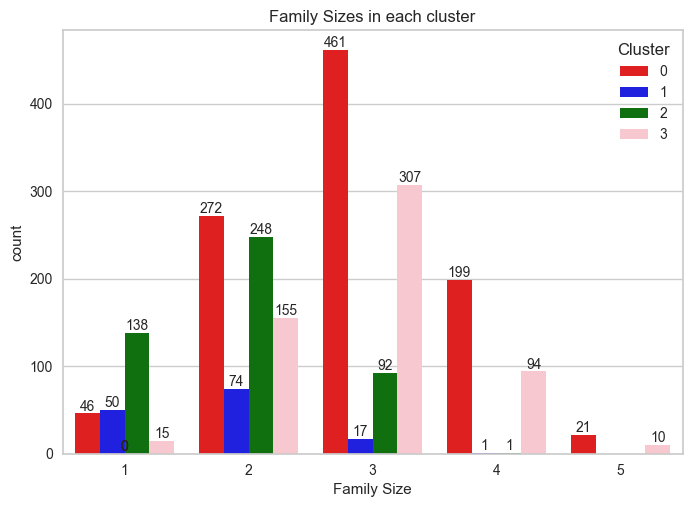

In [128]:
# Plotting Family Sizes in each cluster
plt.figure()

pl = sns.countplot(x= df_org['Family_Size'],
                   hue=df_org['Cluster'] ,
                   palette= ['red', 'blue','green', 'pink'])

pl.set_title("Family Sizes in each cluster")
pl.set_xlabel("Family Size")

# Loop through the bars and add the count value on top of each
for p in pl.patches:
    # Get the height of the bar (the count value)
    height = p.get_height()
    
    # Get the x-position of the bar
    x_position = p.get_x() + p.get_width() / 2
    
    # Add the text label (height value) on top of each bar
    pl.text(x_position, height + 0.1,  # Positioning the label above the bar
            f'{int(height)}',  # Display the integer value
            ha="center",  # Horizontal alignment to center the text
            va="bottom",  # Vertical alignment to place the text above the bar
            fontsize=10)
plt.show()

#### Insights from the graph:
* **Cluster 0** leads in meduim family sizes (3 members) and small family size of (1 to 2) members (Small to Meduim Families)
*             Consider offering bundles tailored to 2–3-member families.
* **Cluster 1** most in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 2** leads in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 3** leads in large family sizes (4–5 members) and meduim family size of 3 members (Meduim to Larg Families)
*             Tailor campaigns for medium and large families, such as family bundles, home appliances, or family-oriented services.

#### Using Seaborn (sns) to generate visualizations for the relationships between a set of personal features ('Income' , 'Family_Size', 'Education', ...etc.) and the amount spent by a customer.

##### 1. using Seaborn (sns) to generate visualizations for the relationships between 'Income' and the amount spent by a customer.

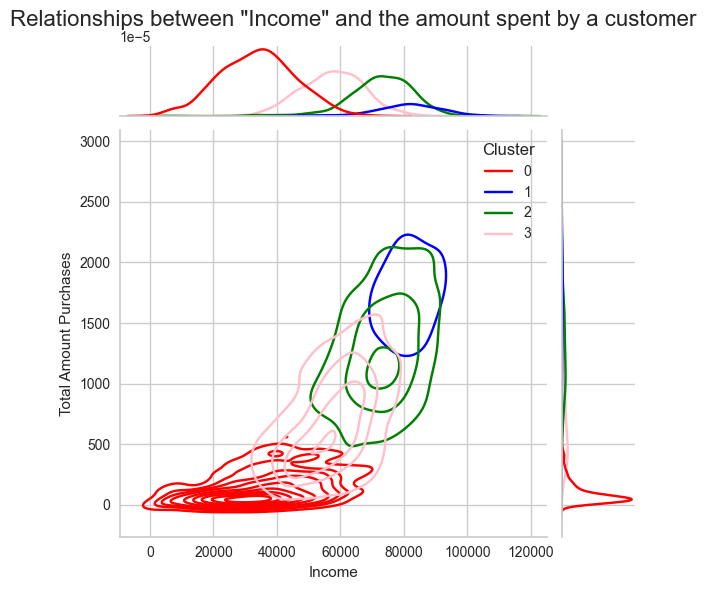

In [129]:
# using Seaborn (sns) to generate visualizations for the relationships between 'Income' and the amount spent by a customer.
# Create the jointplot
joint_plot = sns.jointplot(x=df_org['Income'], y=df_org["Total Amount Purchases"], hue=df_org["Cluster"], kind="kde", palette=['red', 'blue', 'green', 'pink'])

# Set the title on top of the figure
joint_plot.fig.suptitle('Relationships between "Income" and the amount spent by a customer', fontsize=16)

# Adjust the title position to avoid overlap with the plot
joint_plot.fig.subplots_adjust(top=0.92)

# Show the plot
plt.show()

#### Insights from the graph
 **Cluster 0 (Red):**
*   Concentrated in the low-income range (up to $40,000).
*   Total purchases are minimal, mostly below 500.
*   Represents a low-income, low-spending group.
**Engage Cluster 0 with budget-friendly strategies**

**Cluster 1 (Blue):**
*   Located in the middle-income range ($50,000–$80,000).
*   Total purchases range between 500 and 1,500, indicating moderate to high spending.
*   Represents a mid-income, high-spending group.

 **Cluster 2 (Green):**
*   Distributed in the upper-middle-income range ($70,000–$100,000).
*   Total purchases range from 500 to 2,000, suggesting higher spending.
*   Represents a mid-income, high-spending group.
**Target Cluster 2 for premium offerings**

**Cluster 3 (Pink):**
*   Located in the low-mid-income range ($50,000–$90,000).
*   Total purchases are distributed between 500 and 1,500, indicating moderate spending.
